<a href="https://colab.research.google.com/github/tinytiny911/4630/blob/master/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install dlib
!pip3 install face_recognition

In [15]:
# First store some sample images in the folder 'passport image'
!mkdir -p paspor_image
# !cd images; wget -nc https://raw.githubusercontent.com/lovellbrian/ELEC4630/master/Images/obama.jpg
# !cd images; wget -nc https://raw.githubusercontent.com/lovellbrian/ELEC4630/master/Images/biden.jpg
# !cd images; wget -nc https://raw.githubusercontent.com/lovellbrian/ELEC4630/master/Images/two_people.jpg
!cd paspor_image; wget -nc https://raw.githubusercontent.com/tinytiny911/4630/master/selfie.jpg

File ‘selfie.jpg’ already there; not retrieving.



In [0]:
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageDraw
%matplotlib inline

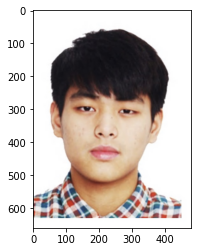

In [17]:
original_image='paspor_image/selfie.jpg'
image=cv2.imread(original_image)
show_img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.show()

In [0]:
# Load a sample picture and learn how to recognize it.
selfie_image = face_recognition.load_image_file("paspor_image/selfie.jpg")
selfie_face_encoding = face_recognition.face_encodings(selfie_image)[0]
# Create arrays of known face encodings and their names
known_face_encodings = [
    selfie_face_encoding,
]
known_face_names = [
    "Shuai Wang",
]

In [24]:
# import unknown faces from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%cd /content/drive/My Drive/redufaces

/content/drive/My Drive/redufaces


In [0]:
path='/content/drive/My Drive/redufaces'

In [0]:
import os

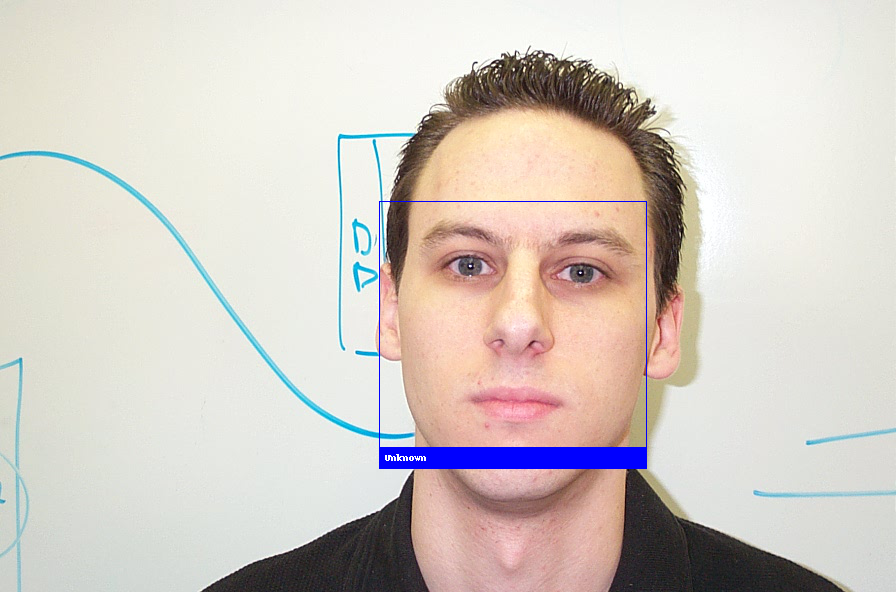

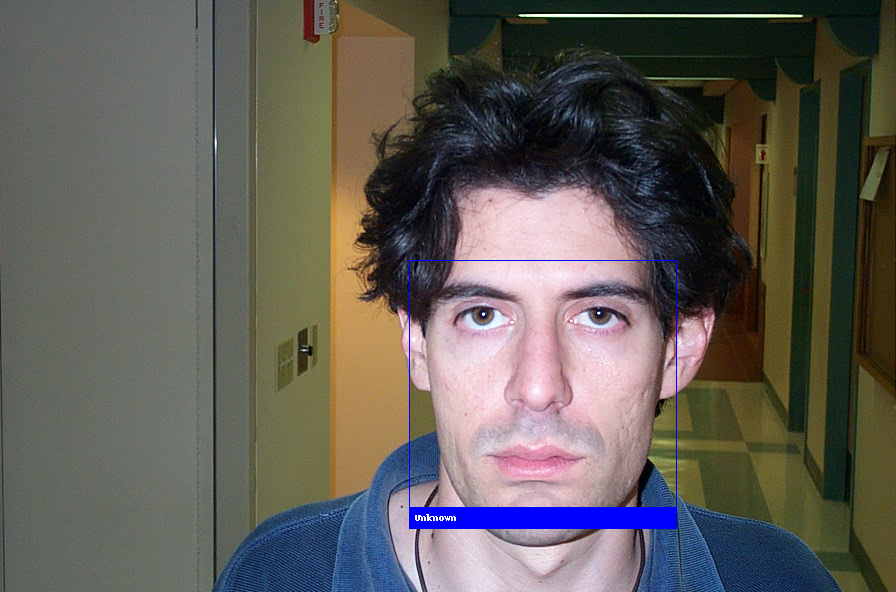

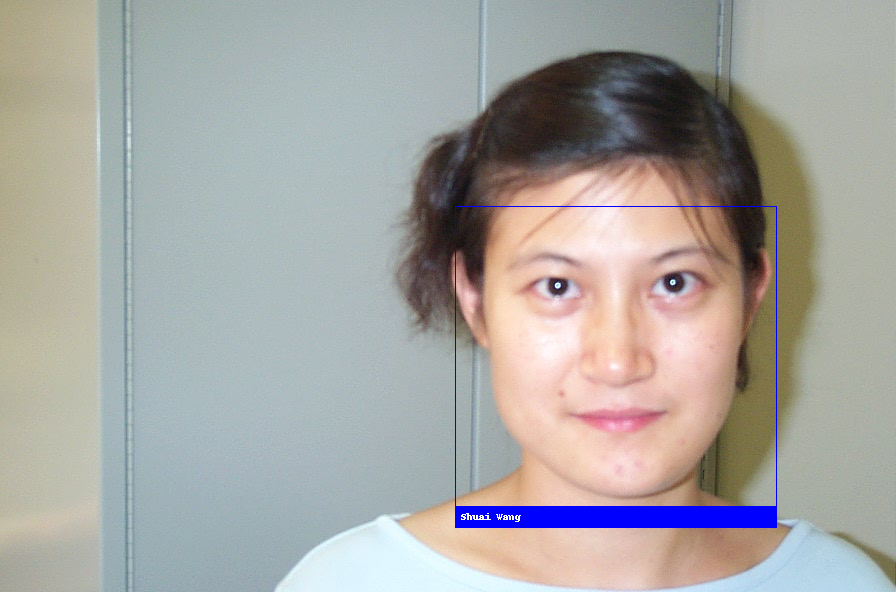

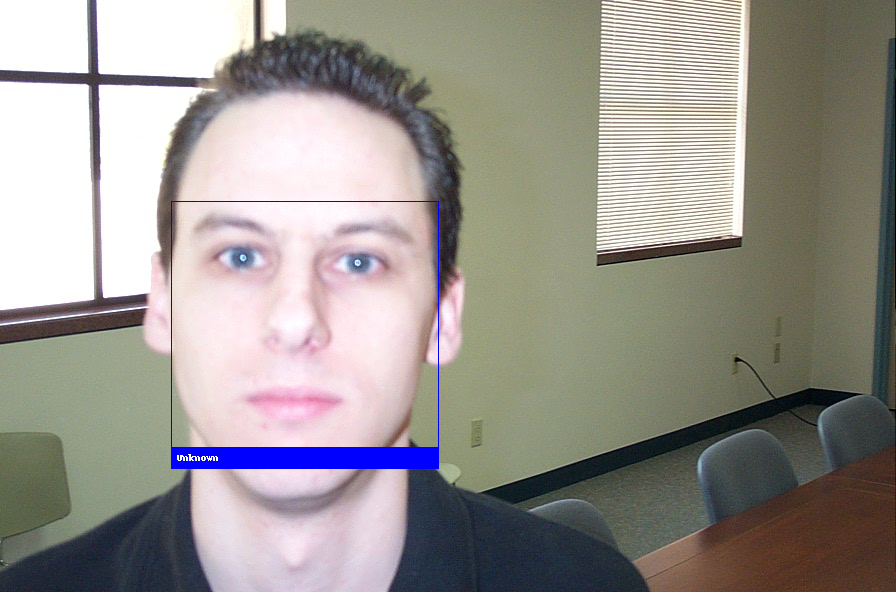

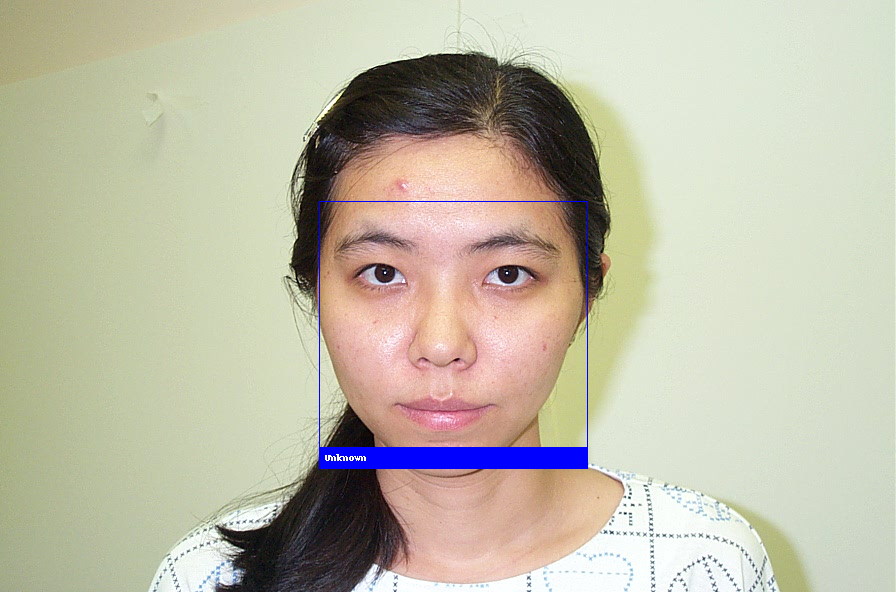

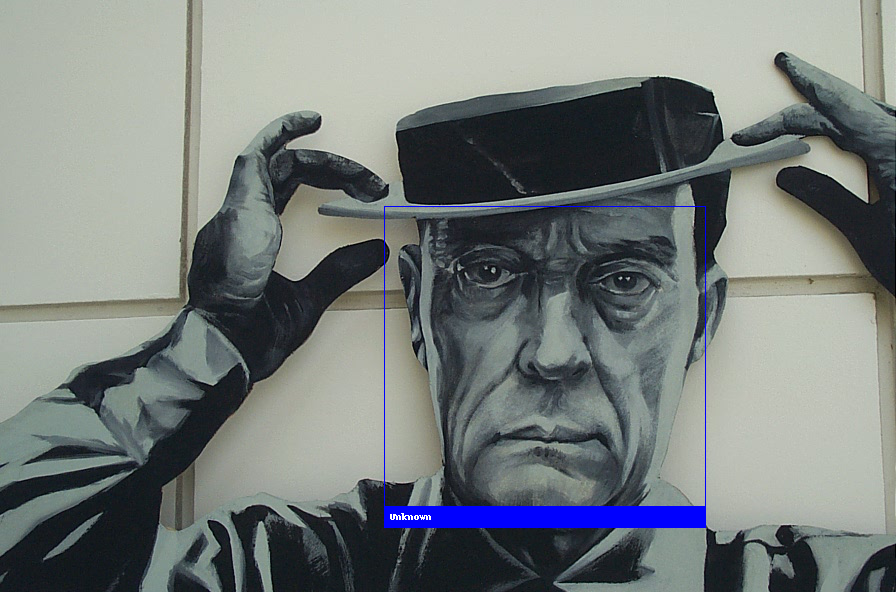

In [0]:
def geturlPath():
    # 指定路径
    path = r'../redufaces/'
    # 返回指定路径的文件夹名称
    dirs = os.listdir(path)
    # 循环遍历该目录下的照片
    for dir in dirs:
        # 拼接字符串
        pa = path+dir
        # 判断是否为照片
        if not os.path.isdir(pa):
            # 使用生成器循环输出
            yield pa
if __name__ == '__main__':
    for item in geturlPath():
       #print(item)
       test_image=item
       # Load an image with an unknown face
       unknown_image = face_recognition.load_image_file(test_image)
       face_locations = face_recognition.face_locations(unknown_image)
       face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

        
       # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
       pil_image = Image.fromarray(unknown_image)
       # Create a Pillow ImageDraw Draw instance to draw with
       draw = ImageDraw.Draw(pil_image)
       # Loop through each face found in the unknown image
       for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
         # See if the face is a match for the known face(s)
         matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

         name = "Unknown"

         face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
         best_match_index = np.argmin(face_distances)
         if matches[best_match_index]:
           name = known_face_names[best_match_index]
         # Draw a box around the face using the Pillow module
         draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
         # Draw a label with a name below the face
         text_width, text_height = draw.textsize(name)
         draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
         draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))  
       # Remove the drawing library from memory as per the Pillow docs
       del draw
       display(pil_image)